In [8]:
import pandas as pd
import glob 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def process_file(file_path):
    head = pd.read_excel(file_path, usecols = 'C', nrows = 5, header = None )
    head.iloc[:,0] = head.iloc[:, 0].str.replace(": ", "", regex = False)
    station_id = head.iloc[0,0]  # sebagai teks ID
    station_name = head.iloc[1,0] # sebagai nama 
    latitude = float(head.iloc[2,0]) # sebagai lintang
    longitude = float(head.iloc[3,0]) # sebagai bujur
    elevation = float(head.iloc[4,0]) # sebagai elevasi

    data = pd.read_excel(file_path, usecols = "A:K", skiprows = 8)
    
    keterangan_index = data[data.iloc[:, 0].str.contains("Keterangan :", na=False)].index
    if not keterangan_index.empty:
        last_row_index = keterangan_index[0] - 4
        relevant_data = data.loc[:last_row_index]
    else:
        relevant_data = data 
    
    data_transposed = relevant_data.T

    headers = data_transposed.iloc[0].values

    tavg_data = data_transposed.iloc[3].values

    tavg_df = pd.DataFrame([tavg_data], columns = headers)

    return tavg_df


file_pattern = 'data_kalimantan/laporan_iklim_harian*.xlsx'
files = glob.glob(file_pattern)

all_data = []

for file in files:
    df = process_file(file)
    all_data.append(df)

final_combined_data = pd.concat(all_data, ignore_index = True)


In [9]:
daily_avg=final_combined_data.mean()

In [10]:
dates = df.columns[0:]
dates = pd.to_datetime(dates, dayfirst=True)

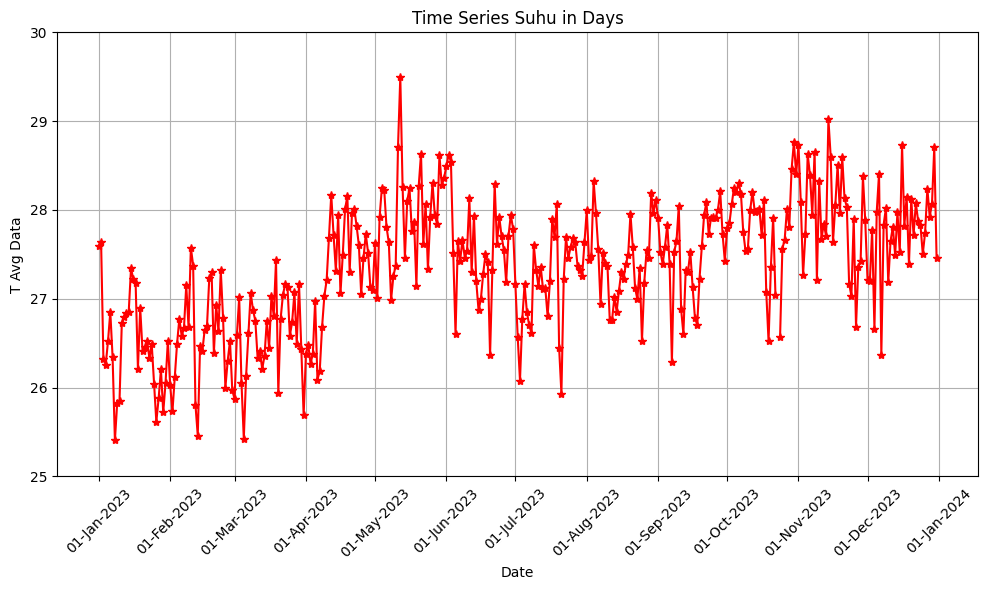

In [11]:
# Plot data Harian

plt.figure(figsize=(10,6))
plt.plot(dates, daily_avg, marker='*', color='r')

# Atur format tanggal di sumbu x untuk menampilkan satu tanggal setiap awal bulan
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Menampilkan tanggal setiap awal bulan
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))  # Format tanggal (misal: 01-Jan-2024)

plt.xticks(rotation=45)
plt.ylim(25, 30)
plt.xlabel("Date")
plt.ylabel('T Avg Data')
plt.title(f'Time Series Suhu in Days')
plt.grid(True)
plt.tight_layout()

# Tampilkan plot
plt.show()


In [12]:
# Data Rata rata bulanan

def process_file(file_path):
    # Membaca metadata stasiun (ID, nama, latitude, dll.)
    head = pd.read_excel(file_path, usecols='C', nrows=5, header=None)
    head.iloc[:, 0] = head.iloc[:, 0].str.replace(": ", "", regex=False)

    station_id = head.iloc[0, 0]
    station_name = head.iloc[1, 0]
    latitude = float(head.iloc[2, 0])
    longitude = float(head.iloc[3, 0])
    elevation = float(head.iloc[4, 0])

    # Membaca bagian data
    data = pd.read_excel(file_path, usecols="A:K", skiprows=8)
    
    # Cari indeks "Keterangan :" jika ada
    keterangan_index = data[data.iloc[:, 0].str.contains("Keterangan :", na=False)].index
    if not keterangan_index.empty:
        last_row_index = keterangan_index[0] - 4
        relevant_data = data.loc[:last_row_index]
    else:
        relevant_data = data  # Gunakan seluruh data jika "Keterangan" tidak ditemukan

    # Transpose data untuk mendapatkan tanggal sebagai kolom dan Tavg di baris tertentu
    data_transposed = relevant_data.T
    headers = data_transposed.iloc[0].values  # Tanggal sebagai header
    tavg_data = data_transposed.iloc[3].values  # Data Tavg (di baris ke-4)

    # Buat dataframe dengan tanggal sebagai kolom dan Tavg sebagai data
    tavg_df = pd.DataFrame([tavg_data], columns=headers)
    
    # Ubah header menjadi format datetime untuk manipulasi lebih lanjut
    tavg_df.columns = pd.to_datetime(tavg_df.columns, errors='coerce', dayfirst=True)
    
    return tavg_df


file_pattern = 'data_kalimantan/laporan_iklim_harian*.xlsx'
files = glob.glob(file_pattern)

all_data = []

# Memproses setiap file dan menambahkan data Tavg
for file in files:
    df = process_file(file)
    all_data.append(df)

# Menggabungkan semua data ke dalam satu dataframe
final_combined_data = pd.concat(all_data, axis=1)

# Transpose dataframe agar tanggal menjadi index dan Tavg menjadi nilai
final_combined_data = final_combined_data.T

# Membuat kolom baru untuk menyimpan periode bulanan (Year-Month)
final_combined_data['Month'] = final_combined_data.index.to_series().dt.to_period('M')

# Menghitung rata-rata bulanan dengan groupby berdasarkan kolom 'Month'
monthly_avg = final_combined_data.groupby('Month').mean()



In [13]:
# Mengambil data time series (jika perlu)
time_series_data = df.iloc[0, 5:]

# Konversi kolom tanggal ke tipe datetime
dates = pd.to_datetime(df.columns[5:], dayfirst=True)

# Mengambil nama bulan dari 'dates'
month_names = dates.strftime('%B')

# Menghapus duplikasi jika diperlukan
months = pd.Series(month_names).drop_duplicates()


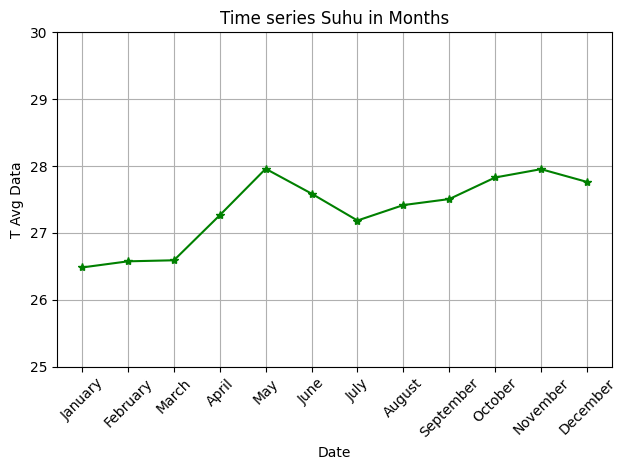

In [14]:
# Plot data bulanan

plt.plot(months, monthly_avg, marker = '*', color = 'g')
plt.xticks(rotation = 45)
plt.ylim(25, 30)
plt.xlabel("Date")
plt.ylabel('T Avg Data')
plt.title(f'Time series Suhu in Months')
plt.grid(True)
plt.tight_layout()